In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('../../home_depot.csv', encoding='utf-8')
df.columns = [c.replace(' ', '_') for c in df.columns]
print(df.columns.to_list())

['Company', 'Star_Rating', 'Current_Employee', 'Work_Duration', 'Review_Title', 'Date_Posted', 'Job_\t\t\t\tTitle', 'Job_Location', 'Recommend', 'CEO_Approval', 'Business_Outlook', 'Pros', 'Cons', 'Advice_to_\t\t\tManagement']


In [49]:
df.rename(columns = {'Job_\t\t\t\tTitle':'Job_Title', 'Advice_to_\t\t\tManagement':'Advice_to_Management'}, inplace = True)

In [50]:
df.columns.to_list()

['Company',
 'Star_Rating',
 'Current_Employee',
 'Work_Duration',
 'Review_Title',
 'Date_Posted',
 'Job_Title',
 'Job_Location',
 'Recommend',
 'CEO_Approval',
 'Business_Outlook',
 'Pros',
 'Cons',
 'Advice_to_Management']

In [51]:
df.dtypes

Company                  object
Star_Rating             float64
Current_Employee          int64
Work_Duration            object
Review_Title             object
Date_Posted              object
Job_Title                object
Job_Location             object
Recommend                 int64
CEO_Approval              int64
Business_Outlook          int64
Pros                     object
Cons                     object
Advice_to_Management     object
dtype: object

In [52]:

df['Date_Posted'] = pd.to_datetime(df['Date_Posted'], dayfirst=True)


In [53]:
df = df[~(df['Date_Posted'] < '2016-01-01')]


In [54]:
quarters = pd.Series(pd.date_range('2016-01-01', '2022-12-31', freq='QS'))


In [55]:
aggregates = dict()
counts = dict()
count = 0
for q in quarters:
	aggregates[f'Q{count+1}'] = 0
	counts[f'Q{count+1}'] = 0
	count += 1

In [56]:
for idx, row in df.iterrows():
	for i in range(len(quarters)):
		if i < len(quarters) - 1:
			if row['Date_Posted'] >= quarters[i] and row['Date_Posted'] < quarters[i+1]:
				aggregates[f'Q{i+1}'] += row['Star_Rating']
				counts[f'Q{i+1}'] += 1

In [57]:
print(aggregates)
print(counts)

{'Q1': 3824.0, 'Q2': 3932.0, 'Q3': 5164.0, 'Q4': 2382.0, 'Q5': 2683.0, 'Q6': 1950.0, 'Q7': 3708.0, 'Q8': 4369.0, 'Q9': 3801.0, 'Q10': 3415.0, 'Q11': 2779.0, 'Q12': 2373.0, 'Q13': 3445.0, 'Q14': 3393.0, 'Q15': 2823.0, 'Q16': 1419.0, 'Q17': 1888.0, 'Q18': 1635.0, 'Q19': 3417.0, 'Q20': 6259.0, 'Q21': 9414.0, 'Q22': 7611.0, 'Q23': 7390.0, 'Q24': 6668.0, 'Q25': 5658.0, 'Q26': 0, 'Q27': 0, 'Q28': 0}
{'Q1': 1166, 'Q2': 1162, 'Q3': 1528, 'Q4': 749, 'Q5': 778, 'Q6': 614, 'Q7': 1058, 'Q8': 1285, 'Q9': 1109, 'Q10': 1030, 'Q11': 872, 'Q12': 669, 'Q13': 1019, 'Q14': 986, 'Q15': 779, 'Q16': 360, 'Q17': 501, 'Q18': 430, 'Q19': 938, 'Q20': 1700, 'Q21': 2369, 'Q22': 2077, 'Q23': 1992, 'Q24': 1810, 'Q25': 1503, 'Q26': 0, 'Q27': 0, 'Q28': 0}


In [58]:
average_ratings = []
quarts = []
for key, value in aggregates.items():
	if counts[key]!=0:
		avg_rating = value/counts[key]
		average_ratings.append(avg_rating)
		quarts.append(key)
		print(key, avg_rating)

Q1 3.2795883361921097
Q2 3.3838209982788294
Q3 3.3795811518324608
Q4 3.1802403204272363
Q5 3.448586118251928
Q6 3.175895765472313
Q7 3.504725897920605
Q8 3.4
Q9 3.4274120829576193
Q10 3.3155339805825244
Q11 3.186926605504587
Q12 3.5470852017937218
Q13 3.380765456329735
Q14 3.4411764705882355
Q15 3.6238767650834403
Q16 3.941666666666667
Q17 3.7684630738522955
Q18 3.802325581395349
Q19 3.642857142857143
Q20 3.681764705882353
Q21 3.9738286196707473
Q22 3.664419836302359
Q23 3.709839357429719
Q24 3.683977900552486
Q25 3.7644710578842315


In [59]:
print(average_ratings)
print(len(average_ratings))

[3.2795883361921097, 3.3838209982788294, 3.3795811518324608, 3.1802403204272363, 3.448586118251928, 3.175895765472313, 3.504725897920605, 3.4, 3.4274120829576193, 3.3155339805825244, 3.186926605504587, 3.5470852017937218, 3.380765456329735, 3.4411764705882355, 3.6238767650834403, 3.941666666666667, 3.7684630738522955, 3.802325581395349, 3.642857142857143, 3.681764705882353, 3.9738286196707473, 3.664419836302359, 3.709839357429719, 3.683977900552486, 3.7644710578842315]
25


In [60]:
def normalize_list(data):
	x_min = min(data)
	x_max = max(data)
	return [(x-x_min)/(x_max-x_min) for x in data]

In [61]:
norm_ratings = normalize_list(average_ratings)
print(norm_ratings)

print(len(norm_ratings))

[0.12995149926989974, 0.26057986171704695, 0.25526632383718634, 0.005444762591318298, 0.3417459894586581, 0.0, 0.41210251052843216, 0.28085600605180194, 0.3152098778260834, 0.17499995692054252, 0.013824271020091457, 0.4651888117757581, 0.25675053957168453, 0.3324599353443231, 0.5614269386879024, 0.9596934092450814, 0.742628036008428, 0.785065826813608, 0.5852138747362612, 0.6339743222106226, 1.0, 0.6122370676424826, 0.6691585503065673, 0.636747982498563, 0.737625088771628]
25


Text(0, 0.5, 'Avg rating')

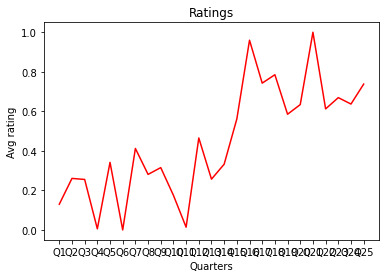

In [62]:
import matplotlib.pyplot as plt

plt.plot(quarts, norm_ratings, color = 'red')
plt.title('Ratings')
plt.xlabel('Quarters')
plt.ylabel('Avg rating')


# plt.show()

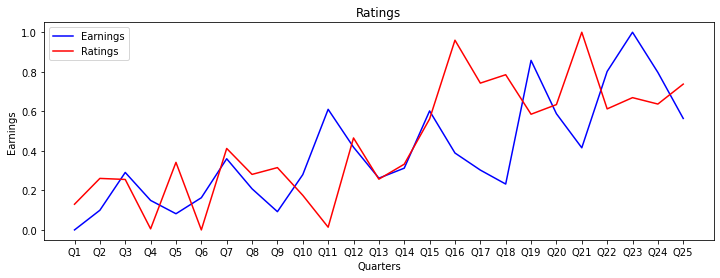

In [63]:
earnings = [
3.352,
4.129,
4.807,
4.145,
2.857,
3.432,
4.332,
2.245,
2.481,
2.769,
3.479,
2.513,
2.344,
2.867,
3.506,
2.404,
1.779,
2.165,
2.672,
2.014,
1.744,
1.969,
2.441,
1.803,
1.471
]

earnings = earnings[::-1]
# for i in range(2):
# 	earnings.insert(0, 0)

fig = plt.figure()
a = plt.plot(normalize_list(earnings), color = 'blue', label = 'Earnings')
plt.plot(quarts, norm_ratings, color = 'red', label	= 'Ratings')
plt.title('Ratings')
plt.xlabel('Quarters')
plt.ylabel('Earnings')
plt.legend(	loc = 'upper left')
fig.set_figwidth(12)

plt.show()

In [64]:
final = pd.DataFrame(
    {'quarters': quarts,
     'ratings': norm_ratings,
     'earnings': normalize_list(earnings)
    })

final.head()

,quarters,ratings,earnings
0,Q1,0.129951,0.000000
1,Q2,0.260580,0.099520
2,Q3,0.255266,0.290767
3,Q4,0.005445,0.149281
4,Q5,0.341746,0.081835


In [65]:
corr = final['ratings'].corr(final['earnings'], method = 'pearson')
corr

0.4700473105029474



Current lag: 0


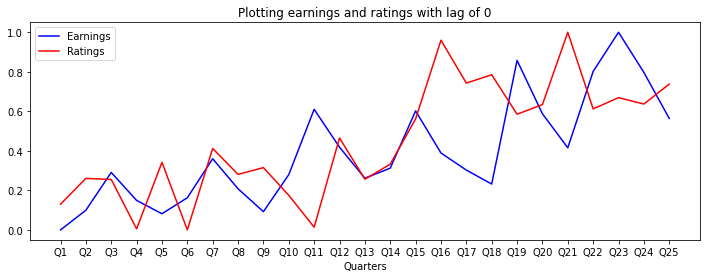

Correlation:  0.4700473105029474


Current lag: 1


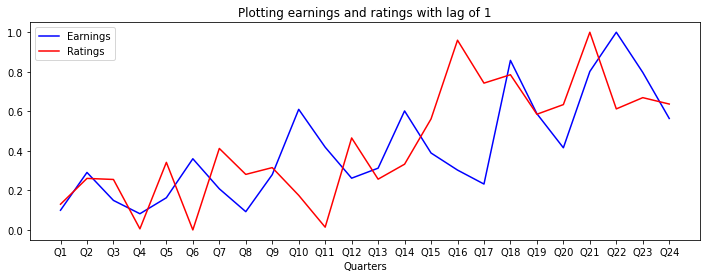

Correlation:  0.5084882604233409


Current lag: 2


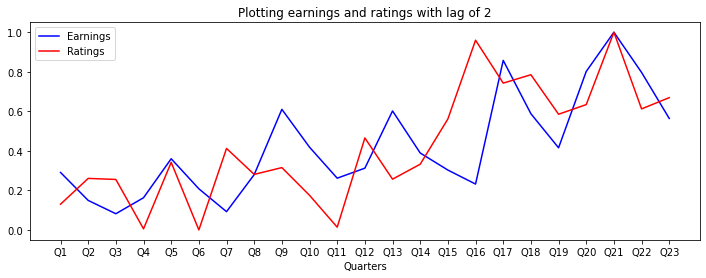

Correlation:  0.5975085446895969


Current lag: 3


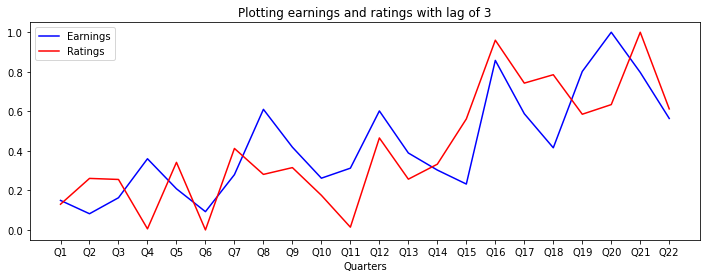

Correlation:  0.705567195950899


Current lag: 4


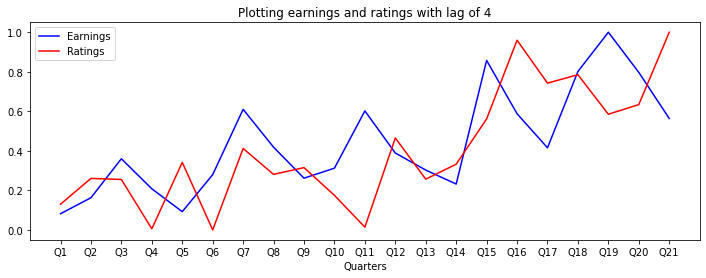

Correlation:  0.5726185039046435


In [66]:

for lag in range(0, 5):
	print('\n\nCurrent lag:', lag)
	fig = plt.figure()
	a = plt.plot(normalize_list(earnings)[lag:], color = 'blue', label = 'Earnings')
	if lag == 0:
		q = quarts
		r = norm_ratings
	else:	
		q = quarts[:-lag]
		r = norm_ratings[:-lag]
	plt.plot(q, r, color = 'red', label	= 'Ratings')
	plt.title('Plotting earnings and ratings with lag of ' + str(lag))
	plt.xlabel('Quarters')
	plt.ylabel('')
	plt.legend(	loc = 'upper left')
	fig.set_figwidth(12)
	plt.show()

	final = pd.DataFrame(
    {'quarters': q,
     'ratings': r,
     'earnings': normalize_list(earnings)[lag:]
    })
	corr = final['ratings'].corr(final['earnings'],method = 'pearson')
	print('Correlation: ', corr)

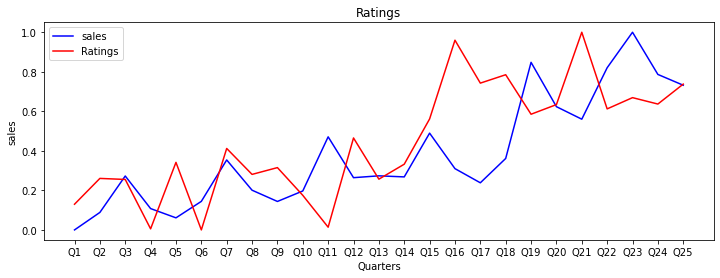

In [67]:
sales = [
35720,
36820,
41118,
37500,
32261,

33536,
38053,
28260,
25780,

27223,
30839,
26381,
26490,
26302,
30463,
24947,
23880,
25026,
28108,
23887,
22210,
23154,
26472,
22762,
20980

]

sales = sales[::-1]
# for i in range(2):
# 	earnings.insert(0, 0)

fig = plt.figure()
a = plt.plot(normalize_list(sales), color = 'blue', label = 'sales')
plt.plot(quarts, norm_ratings, color = 'red', label	= 'Ratings')
plt.title('Ratings')
plt.xlabel('Quarters')
plt.ylabel('sales')
plt.legend(	loc = 'upper left')
fig.set_figwidth(12)

plt.show()



Current lag: 0


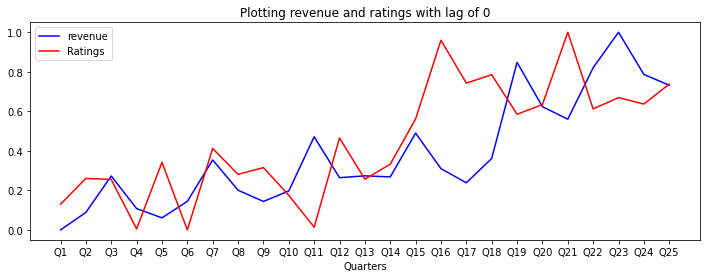

0.5681167251982369


Current lag: 1


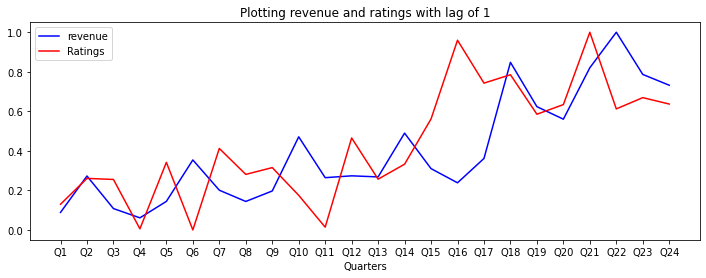

0.6106220979641374


Current lag: 2


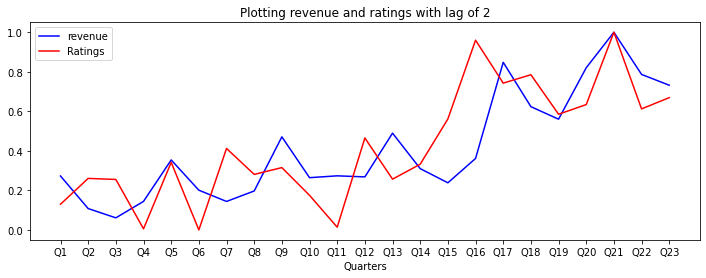

0.7168788689982565


Current lag: 3


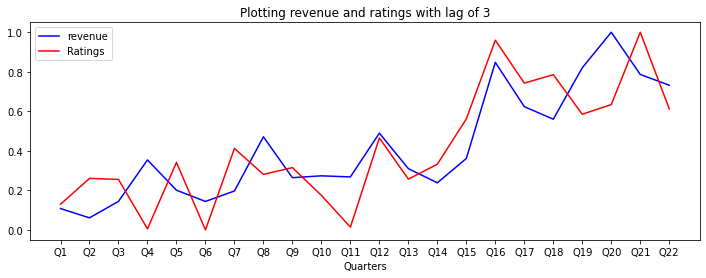

0.7772449879317073


Current lag: 4


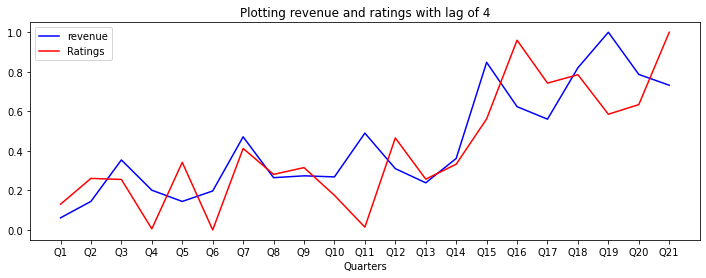

0.7260997490439431


In [19]:

for lag in range(0, 5):
	print('\n\nCurrent lag:', lag)
	fig = plt.figure()
	a = plt.plot(normalize_list(sales)[lag:], color = 'blue', label = 'revenue')
	if lag == 0:
		q = quarts
		r = norm_ratings
	else:	
		q = quarts[:-lag]
		r = norm_ratings[:-lag]
	plt.plot(q, r, color = 'red', label	= 'Ratings')
	plt.title('Plotting revenue and ratings with lag of ' + str(lag))
	plt.xlabel('Quarters')
	plt.ylabel('')
	plt.legend(	loc = 'upper left')
	fig.set_figwidth(12)
	plt.show()

	final = pd.DataFrame(
    {'quarters': q,
     'ratings': r,
     'revenue': normalize_list(sales)[lag:]
    })
	corr = final['ratings'].corr(final['revenue'],method = 'pearson')
	print(corr)

	
